In [1]:
#importing the libraries and packages required to run the given assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import math
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from collections import defaultdict
import statistics
import seaborn as sns
from sklearn import tree
from scipy.stats import chi2_contingency
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import datetime
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#mounting google drive in order read dataset
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#link of the dataset in drive
data =  "./gdrive/My Drive/FDS_Dataset_Cleaned/Cleaned_Total.csv"
data

'./gdrive/My Drive/FDS_Dataset_Cleaned/Cleaned_Total.csv'

In [4]:
#reading dataset
df = pd.read_csv(data)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
#getting an overview of the features
df.info("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6826005 entries, 0 to 6826004
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   CMPLNT_FR_DT       object 
 2   CMPLNT_FR_TM       object 
 3   CMPLNT_TO_DT       object 
 4   RPT_DT             object 
 5   KY_CD              float64
 6   OFNS_DESC          object 
 7   CRM_ATPT_CPTD_CD   object 
 8   LAW_CAT_CD         object 
 9   BORO_NM            object 
 10  LOC_OF_OCCUR_DESC  object 
 11  PREM_TYP_DESC      object 
 12  JURIS_DESC         object 
 13  JURISDICTION_CODE  float64
 14  Lat_Lon            object 
 15  VIC_AGE_GROUP      object 
 16  VIC_RACE           object 
 17  VIC_SEX            object 
 18  Start_Year         float64
 19  Start_Month        float64
 20  Start_Day          float64
 21  Start_Hour         float64
 22  At_Park            object 
 23  At_Train           int64  
dtypes: float64(6), int64(2), object(16)
memory usage: 

In [6]:
#removing the null values from date
new_df = df.dropna(subset=['CMPLNT_FR_DT'])
new_df['CMPLNT_FR_DT'] = pd.to_datetime(new_df['CMPLNT_FR_DT'], errors='coerce')
new_df['CMPLNT_FR_TM'] = pd.to_datetime(new_df['CMPLNT_FR_TM'], errors='coerce')

In [7]:
#sorting data by date
new_df = new_df.sort_values(by='CMPLNT_FR_DT')
new_df = new_df.dropna(subset=['CMPLNT_FR_DT'])
display(new_df.isnull().sum())

Unnamed: 0                 0
CMPLNT_FR_DT               0
CMPLNT_FR_TM              47
CMPLNT_TO_DT         1512883
RPT_DT                     0
KY_CD                      0
OFNS_DESC              15158
CRM_ATPT_CPTD_CD           4
LAW_CAT_CD                 0
BORO_NM                10557
LOC_OF_OCCUR_DESC    1432580
PREM_TYP_DESC          32435
JURIS_DESC                 0
JURISDICTION_CODE       5544
Lat_Lon                  512
VIC_AGE_GROUP              0
VIC_RACE                   0
VIC_SEX                    0
Start_Year                 0
Start_Month                0
Start_Day                  0
Start_Hour                47
At_Park                    0
At_Train                   0
dtype: int64

In [8]:
#info of the cleaned and sorted data
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6826005 entries, 5149020 to 745874
Data columns (total 24 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Unnamed: 0         int64         
 1   CMPLNT_FR_DT       datetime64[ns]
 2   CMPLNT_FR_TM       datetime64[ns]
 3   CMPLNT_TO_DT       object        
 4   RPT_DT             object        
 5   KY_CD              float64       
 6   OFNS_DESC          object        
 7   CRM_ATPT_CPTD_CD   object        
 8   LAW_CAT_CD         object        
 9   BORO_NM            object        
 10  LOC_OF_OCCUR_DESC  object        
 11  PREM_TYP_DESC      object        
 12  JURIS_DESC         object        
 13  JURISDICTION_CODE  float64       
 14  Lat_Lon            object        
 15  VIC_AGE_GROUP      object        
 16  VIC_RACE           object        
 17  VIC_SEX            object        
 18  Start_Year         float64       
 19  Start_Month        float64       
 20  Start_Day          

In [9]:
#changing the format from object to date time format and creating new columns for different period of time
new_df['day'] = new_df['CMPLNT_FR_DT'].dt.day
new_df['year'] = new_df['CMPLNT_FR_DT'].dt.year
new_df['month'] = new_df['CMPLNT_FR_DT'].dt.month
new_df['hour'] = new_df['CMPLNT_FR_TM'].dt.hour
new_df['day_name'] = new_df['CMPLNT_FR_DT'].dt.day_name()
new_df

,Unnamed: 0,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Start_Year,Start_Month,Start_Day,Start_Hour,At_Park,At_Train,day,year,month,hour,day_name
5149020,5149685,2007-01-01,2021-12-02 04:15:00,01/01/2007,01/01/2007,578.0,HARRASSMENT 2,COMPLETED,VIOLATION,BRONX,INSIDE,BAR/NIGHT CLUB,N.Y. POLICE DEPT,0.0,"(40.815600095, -73.90326732)",25-44,WHITE HISPANIC,M,2007.0,1.0,1.0,4.0,0,1,1,2007,1,4.0,Monday
4993351,4993975,2007-01-01,2021-12-02 10:00:00,01/03/2007,01/03/2007,341.0,PETIT LARCENY,COMPLETED,MISDEMEANOR,BRONX,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,"(40.876489219, -73.839659563)",25-44,BLACK,F,2007.0,1.0,1.0,10.0,0,1,1,2007,1,10.0,Monday
4892566,4893161,2007-01-01,2021-12-02 00:01:00,02/28/2007,03/01/2007,121.0,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,FELONY,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,"(40.851487774, -73.935457967)",UNKNOWN,UNKNOWN,E,2007.0,1.0,1.0,0.0,0,1,1,2007,1,0.0,Monday
5922737,5923623,2007-01-01,2021-12-02 16:00:00,01/01/2007,01/01/2007,106.0,FELONY ASSAULT,COMPLETED,FELONY,MANHATTAN,INSIDE,FAST FOOD,N.Y. POLICE DEPT,0.0,"(40.824941106, -73.952819968)",18-24,WHITE HISPANIC,M,2007.0,1.0,1.0,16.0,0,1,1,2007,1,16.0,Monday
4260498,4260915,2007-01-01,2021-12-02 12:00:00,08/01/2007,06/09/2009,112.0,THEFT-FRAUD,COMPLETED,FELONY,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,"(40.866199635, -73.82296281)",18-24,BLACK,F,2007.0,1.0,1.0,12.0,0,1,1,2007,1,12.0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744257,744317,2020-12-31,2021-12-02 15:00:00,12/31/2020,12/31/2020,361.0,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,BRONX,FRONT OF,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,"(40.84034166200007, -73.85649065299998)",25-44,BLACK,M,2020.0,12.0,31.0,15.0,0,1,31,2020,12,15.0,Thursday
744234,744294,2020-12-31,2021-12-02 13:15:00,12/31/2020,12/31/2020,678.0,MISCELLANEOUS PENAL LAW,COMPLETED,VIOLATION,BROOKLYN,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,"(40.687992446000074, -73.96127872199997)",UNKNOWN,UNKNOWN,E,2020.0,12.0,31.0,13.0,0,1,31,2020,12,13.0,Thursday
744171,744231,2020-12-31,2021-12-02 10:42:00,12/31/2020,12/31/2020,578.0,HARRASSMENT 2,COMPLETED,VIOLATION,BRONX,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,"(40.88141487100006, -73.84086637699994)",45-64,ASIAN / PACIFIC ISLANDER,F,2020.0,12.0,31.0,10.0,0,1,31,2020,12,10.0,Thursday
737913,737973,2020-12-31,2021-12-02 15:00:00,12/31/2020,12/31/2020,109.0,GRAND LARCENY,COMPLETED,FELONY,MANHATTAN,OPPOSITE OF,PARK/PLAYGROUND,N.Y. POLICE DEPT,0.0,"(40.71738604900003, -74.01604713299997)",25-44,ASIAN / PACIFIC ISLANDER,M,2020.0,12.0,31.0,15.0,0,1,31,2020,12,15.0,Thursday


Text(0.5, 1.0, 'Year vs Crime Count')

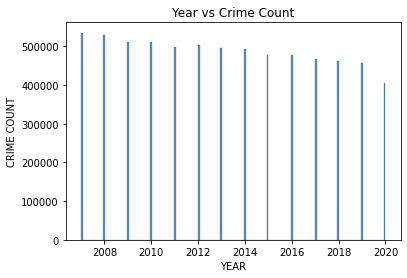

In [10]:
#creating a new dataframe with entries only from 2006 onwards
a20 = new_df[new_df['year'] > 2006]

#plotting year vs crime count graph
sns.histplot(x = a20['year'])
plt.xlabel('YEAR')
plt.ylabel('CRIME COUNT')
plt.title('Year vs Crime Count')

Text(0.5, 1.0, 'TOTAL CRIME COUNT DIFFERENCE')

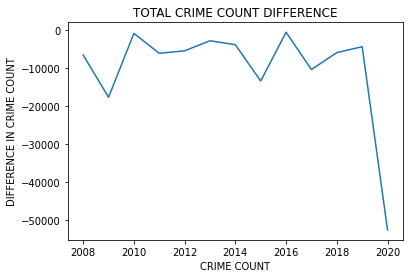

In [11]:
#Calculating the difference of crimes between consecutive years to see the variation of rate
diff = pd.DataFrame(a20['year'].value_counts())
diff['Crime_diff'] = diff['year'].diff()
diff.reset_index(inplace=True)
sns.lineplot(x = diff['index'],y=diff['Crime_diff'])
plt.ylabel('DIFFERENCE IN CRIME COUNT')
plt.xlabel('CRIME COUNT')
plt.title('TOTAL CRIME COUNT DIFFERENCE')

Text(0.5, 1.0, 'Day vs Crime Count')

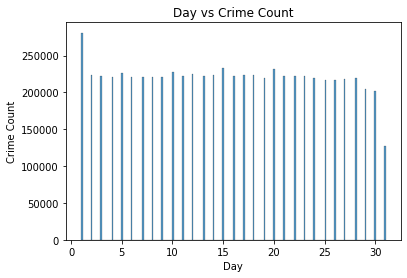

In [12]:
#Visualising the crime on each day of the month
sns.histplot(x = a20['day'])
plt.xlabel('Day')
plt.ylabel('Crime Count')
plt.title('Day vs Crime Count')

Text(0.5, 1.0, 'Hour vs Crime Count')

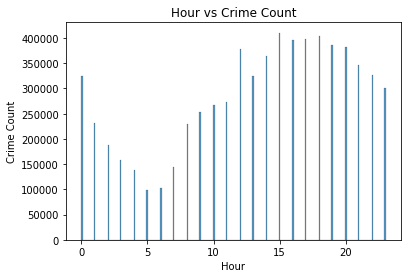

In [13]:
#Visualising the crime on each hour of the day
sns.histplot(a20['hour'])
plt.xlabel('Hour')
plt.ylabel('Crime Count')
plt.title('Hour vs Crime Count')

Text(0.5, 1.0, 'Crime on the days of the week')

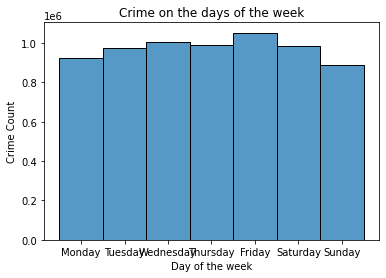

In [33]:
#Visualising the crime on each day of the week
sns.histplot(a20['day_name'])
plt.xlabel('Day of the week')
plt.ylabel('Crime Count')
plt.title('Crime on the days of the week')

Text(0.5, 1.0, 'TOTAL CRIME COUNT BOROUGH-WISE')

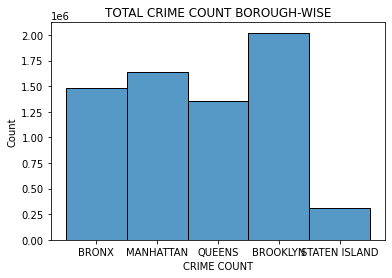

In [15]:
#Visualising the crime count for each borough
sns.histplot(a20['BORO_NM'])
plt.xlabel('BOROUGHS')
plt.xlabel('CRIME COUNT')
plt.title('TOTAL CRIME COUNT BOROUGH-WISE')

In [16]:
contigency= pd.crosstab(a20['year'], a20['LAW_CAT_CD'])

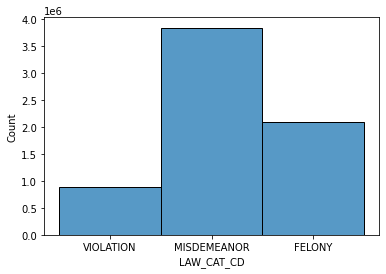

In [17]:
#Crime variation based on the type
contigency_pct = pd.crosstab(a20['year'], a20['LAW_CAT_CD'])
contigency_pct.reset_index(inplace=True)
sns.histplot(x=a20['LAW_CAT_CD'])


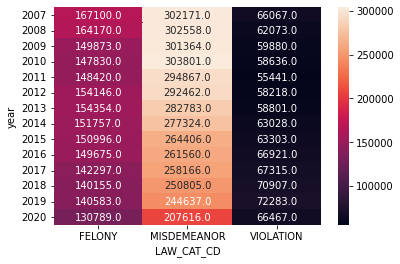

In [18]:
sns.heatmap(contigency, annot=True, fmt=".1f")

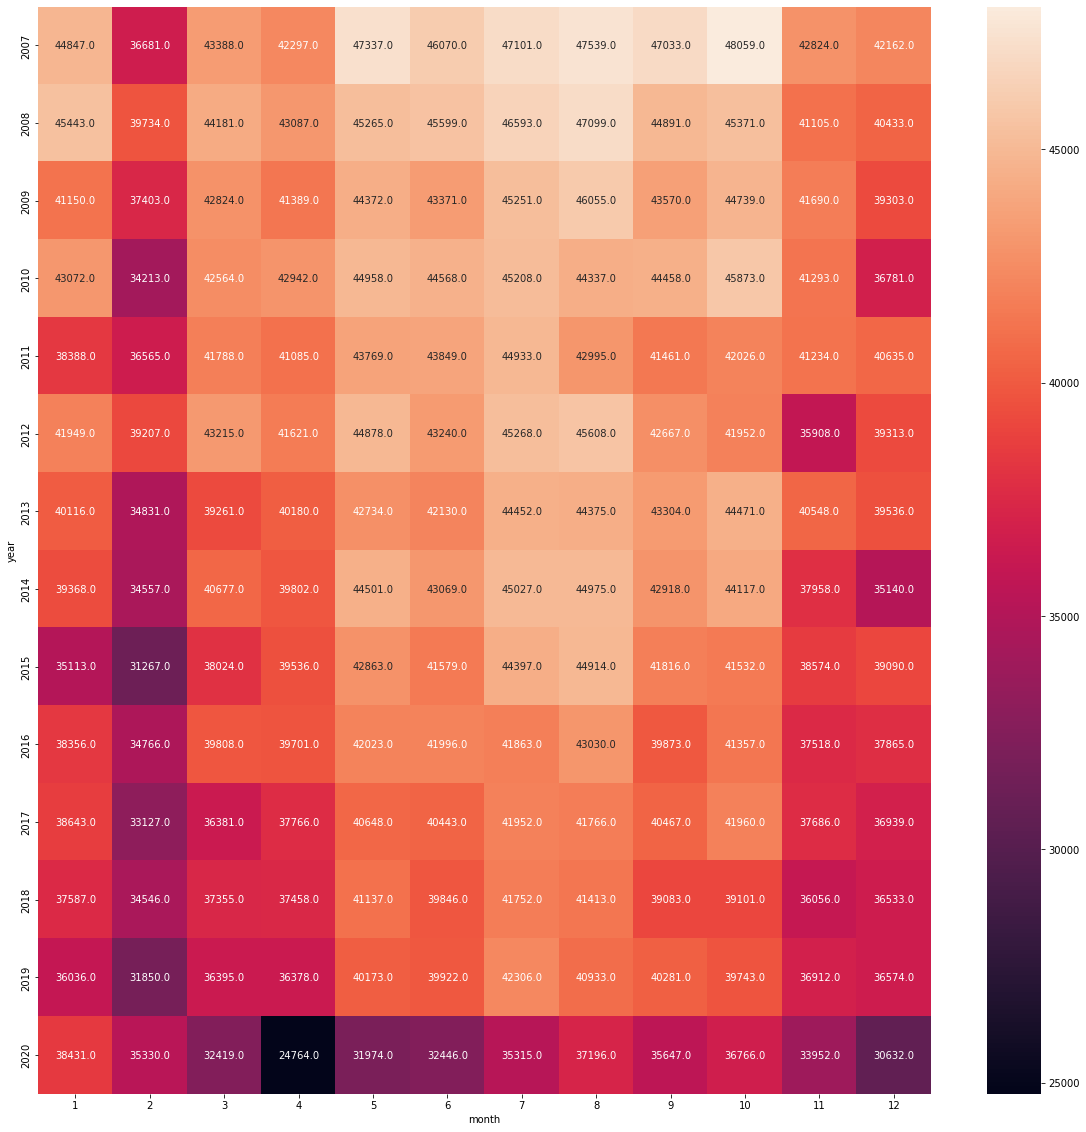

In [19]:
#Heatmap for crimes on year vs each month
contigency_2= pd.crosstab(a20['year'], a20['month'])
plt.figure(figsize=(20,20))
sns.heatmap(contigency_2, annot=True, fmt=".1f")


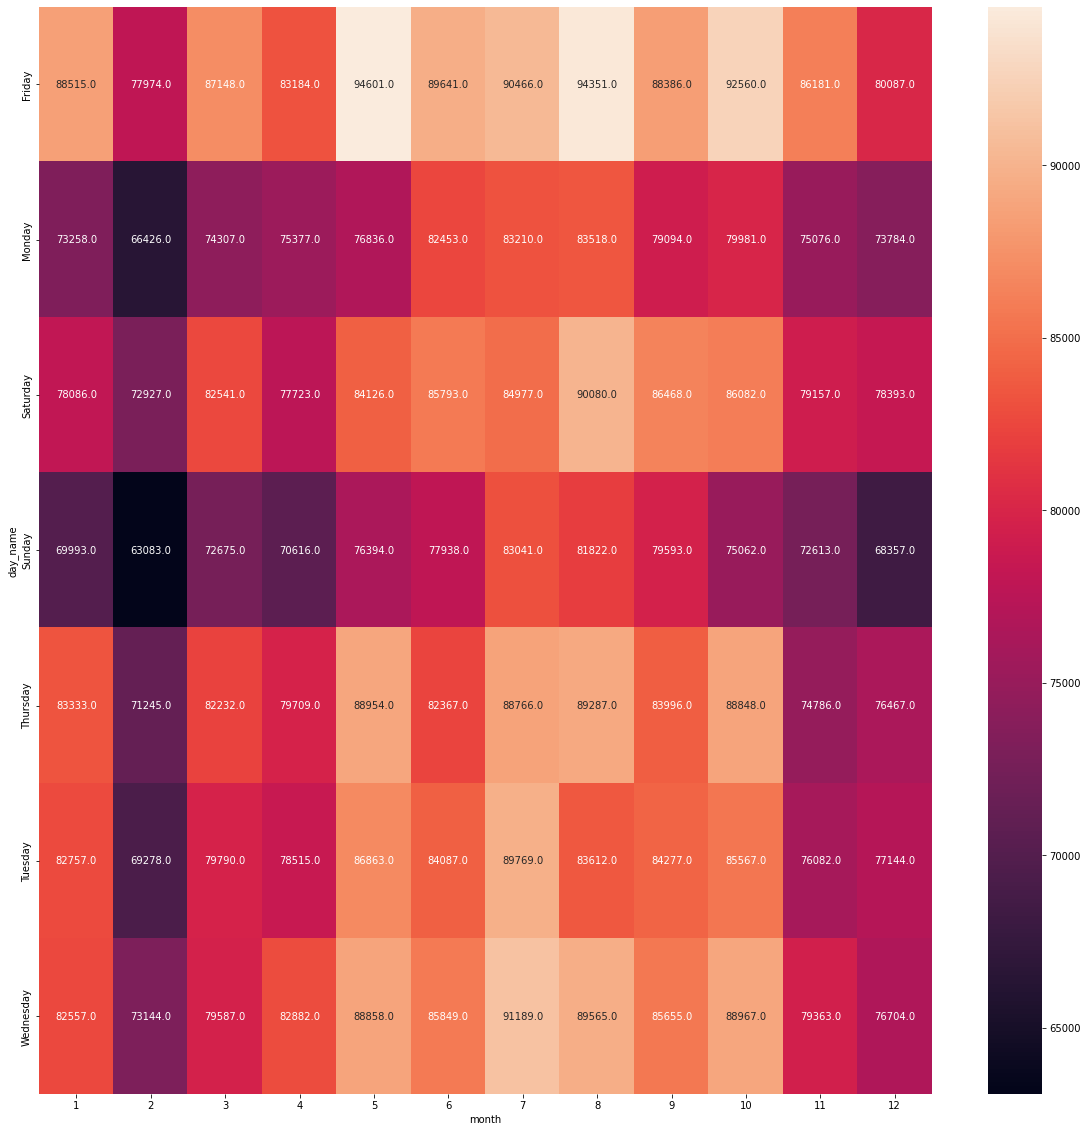

In [20]:
#Heatmap for crimes on days of the week vs each month
contigency_3= pd.crosstab(a20['day_name'], a20['month'])
plt.figure(figsize=(20,20))
sns.heatmap(contigency_3, annot=True, fmt=".1f")

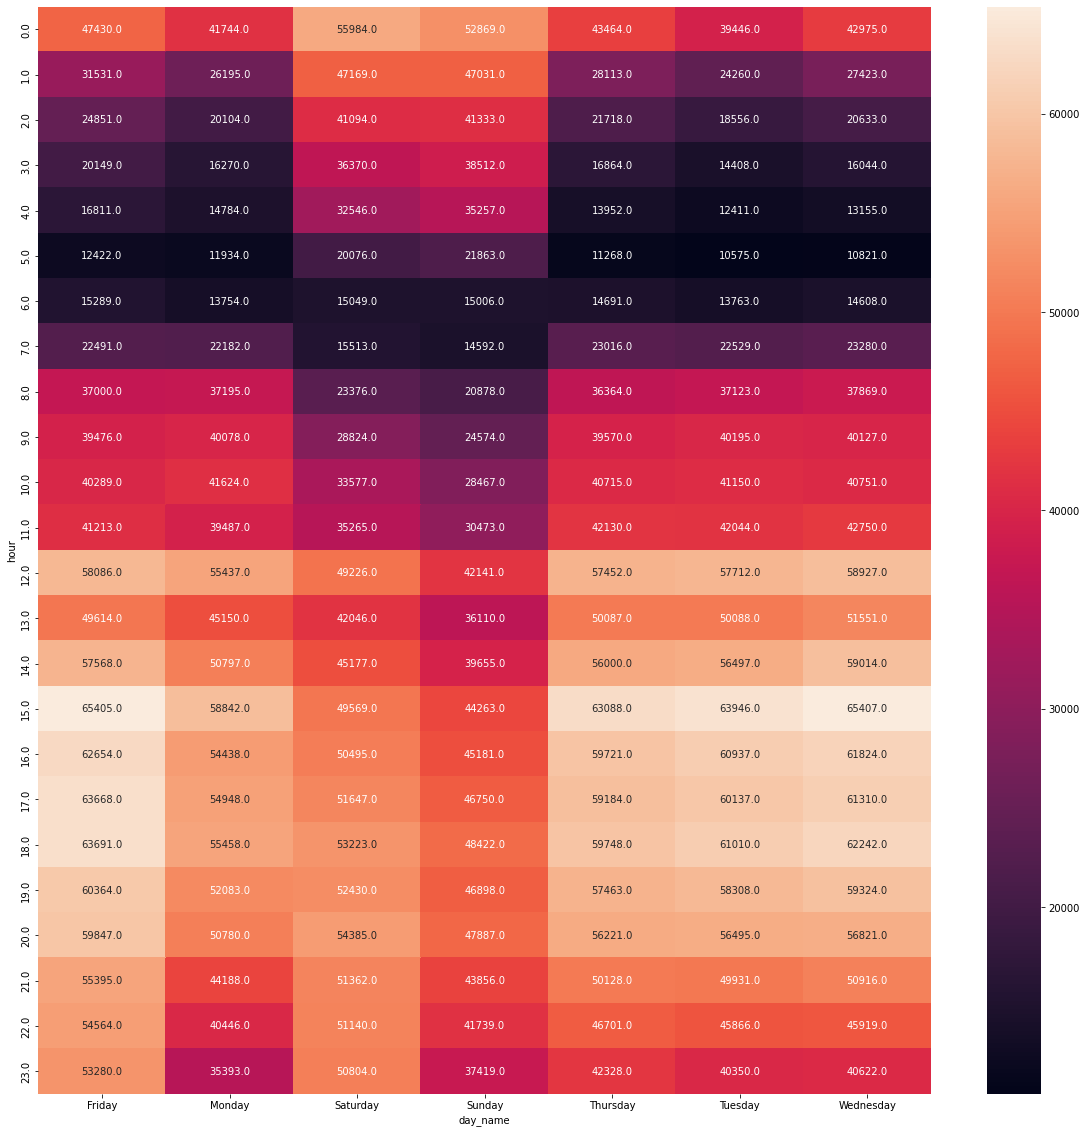

In [21]:
#Heatmap for crimes on days of the week vs hour
contigency_4= pd.crosstab(a20['hour'], a20['day_name'])
plt.figure(figsize=(20,20))
sns.heatmap(contigency_4, annot=True, fmt=".1f")

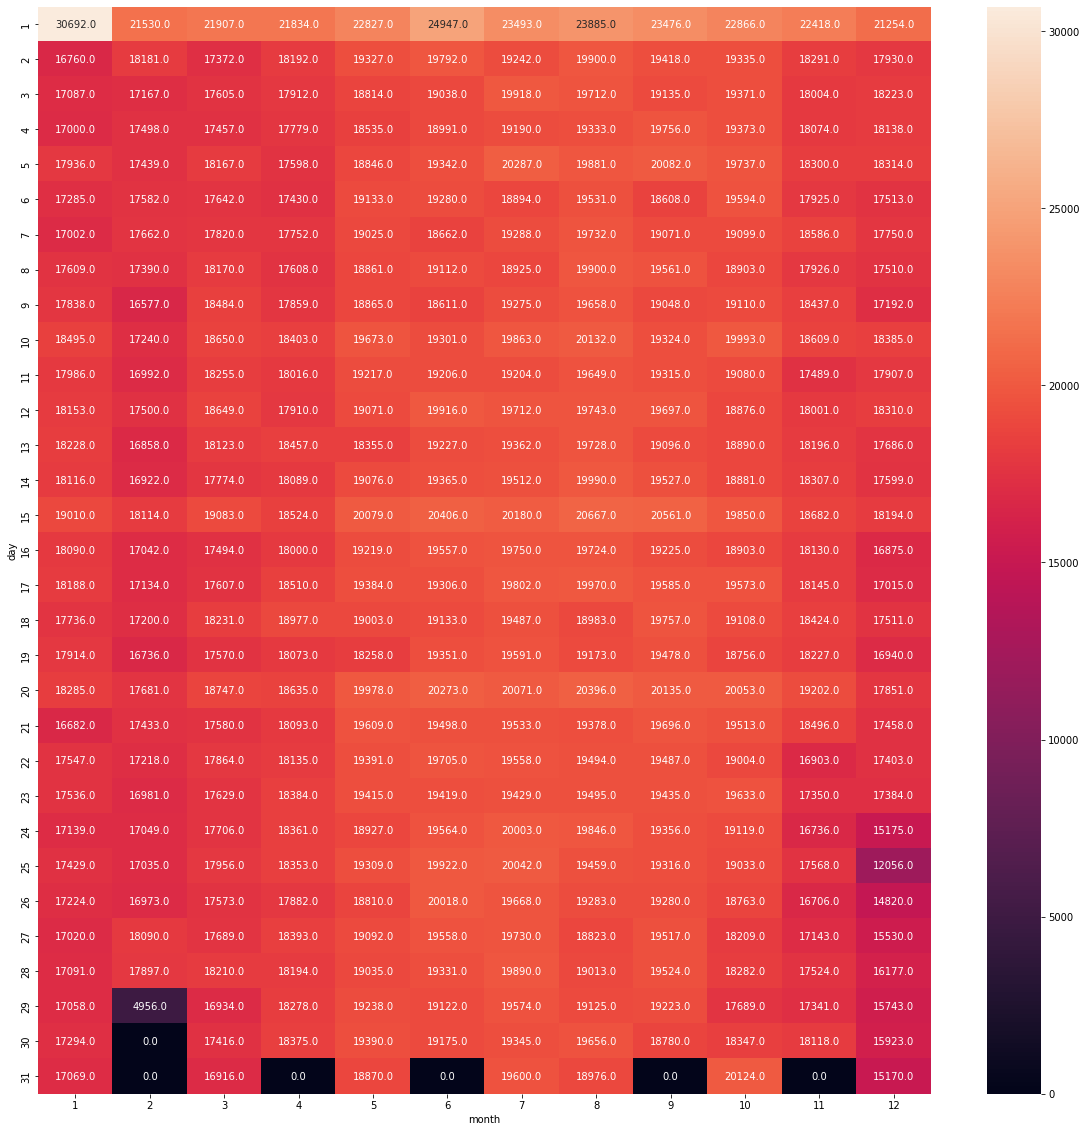

In [22]:
#Heatmap for crimes on day vs each month
contigency_5= pd.crosstab(a20['day'], a20['month'])
plt.figure(figsize=(20,20))
sns.heatmap(contigency_5, annot=True, fmt=".1f")

In [23]:
#calculating the average count for each each month
pdf = a20['CMPLNT_FR_DT'].value_counts()
crime_year = pd.DataFrame(a20.CMPLNT_FR_DT.value_counts().reset_index().values, columns=["CMPLNT_FR_DT", "CRIME COUNT"])
crime_yearindex = crime_year.sort_index(axis = 0, ascending=True)

Text(0.5, 1.0, 'TIME SERIES FOR NYC')

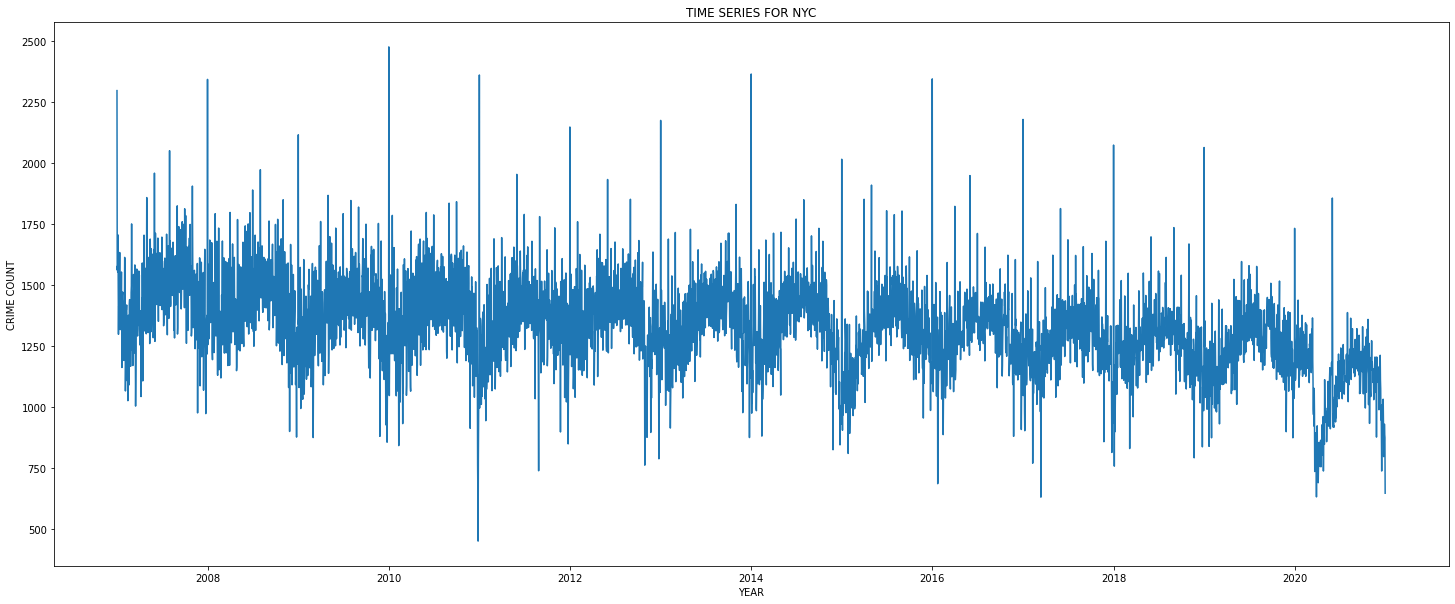

In [24]:
#plotting the time series graph for the crime data
plt.figure(figsize=(25,10))
sns.lineplot(x=crime_yearindex['CMPLNT_FR_DT'], y=crime_yearindex['CRIME COUNT'])
plt.xlabel('YEAR')
plt.ylabel('CRIME COUNT')
plt.title('TIME SERIES FOR NYC')

In [25]:
#Finding the day with highest crime and displaying the crimes which took place that day 
max = crime_yearindex['CRIME COUNT'].max()
june1 = a20[a20['CMPLNT_FR_DT']== '2020-06-01']
june1['OFNS_DESC'].value_counts()

BURGLARY                           442
CRIMINAL MISCHIEF & RELATED OF     363
PETIT LARCENY                      193
HARRASSMENT 2                      184
ASSAULT 3 & RELATED OFFENSES       114
GRAND LARCENY                       81
OFF. AGNST PUB ORD SENSBLTY &       74
FELONY ASSAULT                      71
POSSESSION OF STOLEN PROPERTY       66
ROBBERY                             60
OFFENSES AGAINST PUBLIC ADMINI      36
GRAND LARCENY OF MOTOR VEHICLE      32
MISCELLANEOUS PENAL LAW             30
SEX CRIMES                          23
THEFT-FRAUD                         12
RAPE                                10
DANGEROUS WEAPONS                   10
ARSON                                8
FRAUDS                               7
CRIMINAL TRESPASS                    7
OFFENSES AGAINST THE PERSON          5
VEHICLE AND TRAFFIC LAWS             5
NYS LAWS-UNCLASSIFIED FELONY         5
BURGLAR'S TOOLS                      5
UNAUTHORIZED USE OF A VEHICLE        4
DANGEROUS DRUGS          

In [26]:
#finding the day with least number of crimes
min = crime_yearindex['CRIME COUNT'].min()
crime_yearindex[crime_yearindex['CRIME COUNT']==min]

,CMPLNT_FR_DT,CRIME COUNT
5113,2010-12-27,452


In [27]:
#setting up the data for fitting ARIMA model
crime_yearindex['CRIME COUNT_float'] = crime_yearindex['CRIME COUNT'].astype(float)
arima = crime_yearindex.set_index('CMPLNT_FR_DT')
yy = arima.groupby(pd.Grouper(freq='M')).sum()
yy

,CRIME COUNT_float
CMPLNT_FR_DT,
2007-01-31,44847.0
2007-02-28,36681.0
2007-03-31,43388.0
2007-04-30,42297.0
2007-05-31,47337.0
...,...
2020-08-31,37196.0
2020-09-30,35647.0
2020-10-31,36766.0


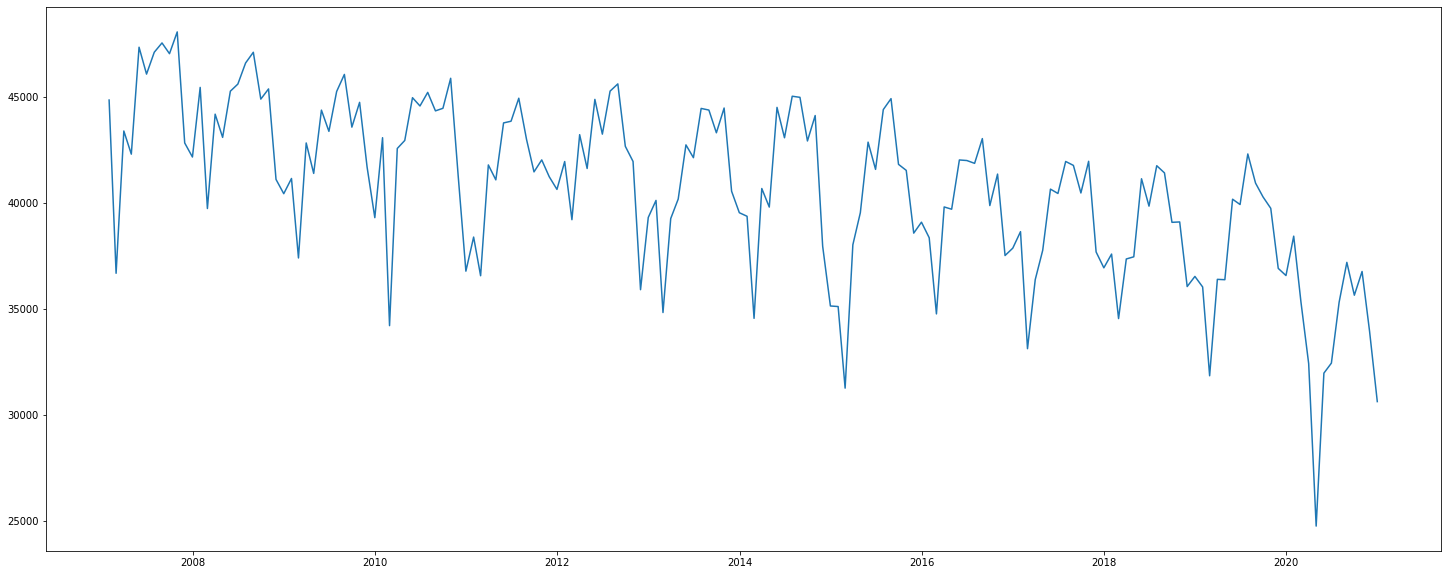

In [28]:
#Plotting the crime average time series model
plt.figure(figsize=(25,10))
plt.plot(yy['CRIME COUNT_float'])

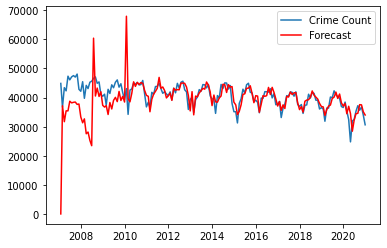

In [29]:
#Fitting the model
model=sm.tsa.statespace.SARIMAX(yy['CRIME COUNT_float'],order=(3,0 ,0),seasonal_order=(1,1,1,18))
results=model.fit()
plt.plot(yy['CRIME COUNT_float'])
plt.plot(results.fittedvalues, color='red')
plt.legend(['Crime Count', 'Forecast'])

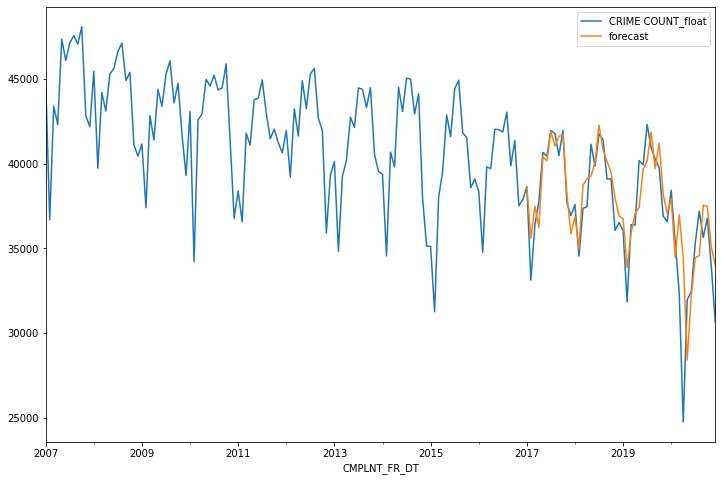

In [30]:
#Prediciting count from 2017 to 2020
yy['forecast']=results.predict(start=120,end=168,dynamic=False)
yy[['CRIME COUNT_float','forecast']].plot(figsize=(12,8))

Text(0, 0.5, 'CRIME COUNT')

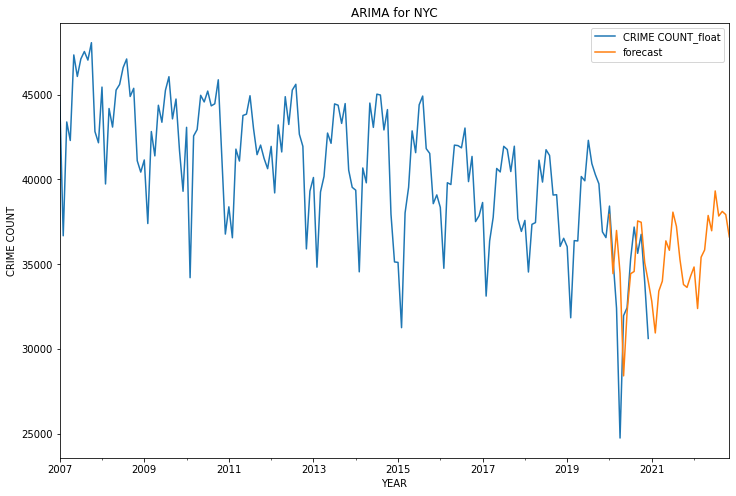

In [31]:
#Forecasting data for another 2 years
from pandas.tseries.offsets import DateOffset
future_dates=[yy.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_arima=pd.DataFrame(index=future_dates[1:],columns=yy.columns)

future_datest_arima.tail()

future_arima=pd.concat([yy,future_datest_arima])
future_arima['forecast'] = results.predict(start = 156, end = 260, dynamic=False)
future_arima[['CRIME COUNT_float','forecast']].plot(figsize=(12, 8))
plt.title('ARIMA for NYC')
plt.xlabel('YEAR')
plt.ylabel('CRIME COUNT')

In [32]:
#Printing the original count vs forecasted count for the year 2020
test = yy[156:168]
test

,CRIME COUNT_float,forecast
CMPLNT_FR_DT,,
2020-01-31,38431.0,37936.810053
2020-02-29,35330.0,34450.607276
2020-03-31,32419.0,36995.021632
2020-04-30,24764.0,34474.069403
2020-05-31,31974.0,28427.797075
2020-06-30,32446.0,32196.341950
2020-07-31,35315.0,34445.700305
2020-08-31,37196.0,34578.823803
2020-09-30,35647.0,37556.156057
